# Pymaceuticals Inc.
---

### Analysis

## Looking at all the data, the two most effective treatments were Capomulin and Ramicane.
## Both of these drug regimens resulted in the lowest Tumor Volumes in the mice. 
## The effects of Capomulin decreasing tumor volume is highighted in the Mouse I509 
## graph below. 
## Lastly, with a higher tumor volume comes a heavier mouse as demonstrated in the last 
## graph.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")

# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
mice_count = data_df["Mouse ID"].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_time = data_df.loc[data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mouse_time


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


dupe_mouse = data_df.loc[data_df["Mouse ID"] == "g989"] 
dupe_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_time_clean = data_df[data_df['Mouse ID'].isin(mouse_time)==False]
mouse_time_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.

mice_count2 = mouse_time_clean["Mouse ID"].nunique()
mice_count2

248

# Summary Statistics

In [7]:
mouse_time_clean.groupby("Drug Regimen").mean()

C:\Users\Micha\AppData\Local\Temp\ipykernel_29652\2125474459.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mouse_time_clean.groupby("Drug Regimen").mean()


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989
Propriva,10.006757,27.135135,17.060811,52.320930,1.013514
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928


## Summary Statistics

In [8]:
mouse_time_clean.groupby("Drug Regimen").mean()[["Tumor Volume (mm3)", "Timepoint"]]

C:\Users\Micha\AppData\Local\Temp\ipykernel_29652\3777542246.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mouse_time_clean.groupby("Drug Regimen").mean()[["Tumor Volume (mm3)", "Timepoint"]]


,Tumor Volume (mm3),Timepoint
Drug Regimen,,
Capomulin,40.675741,21.565217
Ceftamin,52.591172,19.747191
Infubinol,52.884795,18.174157
Ketapril,55.235638,19.707447
Naftisol,54.331565,19.623656
Placebo,54.033581,18.674033
Propriva,52.320930,17.060811
Ramicane,40.216745,21.425439
Stelasyn,54.233149,19.226519


In [9]:
mouse_time_clean.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

C:\Users\Micha\AppData\Local\Temp\ipykernel_29652\1070067658.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mouse_time_clean.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [10]:
mouse_time_clean.groupby("Drug Regimen").mean()[["Tumor Volume (mm3)", "Timepoint"]]

C:\Users\Micha\AppData\Local\Temp\ipykernel_29652\3777542246.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mouse_time_clean.groupby("Drug Regimen").mean()[["Tumor Volume (mm3)", "Timepoint"]]


,Tumor Volume (mm3),Timepoint
Drug Regimen,,
Capomulin,40.675741,21.565217
Ceftamin,52.591172,19.747191
Infubinol,52.884795,18.174157
Ketapril,55.235638,19.707447
Naftisol,54.331565,19.623656
Placebo,54.033581,18.674033
Propriva,52.320930,17.060811
Ramicane,40.216745,21.425439
Stelasyn,54.233149,19.226519


In [11]:
mouse_time_clean.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

C:\Users\Micha\AppData\Local\Temp\ipykernel_29652\1070067658.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mouse_time_clean.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen




# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_table = mouse_time_clean.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median_table = mouse_time_clean.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance_table = mouse_time_clean.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
stddev_table = mouse_time_clean.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
stderr_table = mouse_time_clean.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]



df_summary_table = pd.DataFrame({
    "Mean Tumor Volume":mean_table,
    "Median Tumor Volume":median_table,
    "Tumor Volume Variance":variance_table,
     "Tumor Volume Std. Dev.":stddev_table,
     "Tumor Volume Std. Err.":stderr_table
})

df_summary_table




C:\Users\Micha\AppData\Local\Temp\ipykernel_29652\3215554071.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_table = mouse_time_clean.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
C:\Users\Micha\AppData\Local\Temp\ipykernel_29652\3215554071.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_table = mouse_time_clean.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
C:\Users\Micha\AppData\Local\Temp\ipykernel_29652\3215554071.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. E

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# mouse_time_clean.groupby("Drug Regimen").describe()["Tumor Volume (mm3)"]




aggregate = mouse_time_clean.groupby("Drug Regimen")
df_summary2 = mouse_time_clean.agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]
df_summary2



C:\Users\Micha\AppData\Local\Temp\ipykernel_29652\1893886228.py:11: FutureWarning: ['Mouse ID', 'Drug Regimen', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_summary2 = mouse_time_clean.agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]


mean      50.435293
median    48.933454
var       79.462907
std        8.914197
sem        0.205591
Name: Tumor Volume (mm3), dtype: float64

## Bar and Pie Charts

In [14]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [15]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

counts = mouse_time_clean["Drug Regimen"].value_counts()
counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

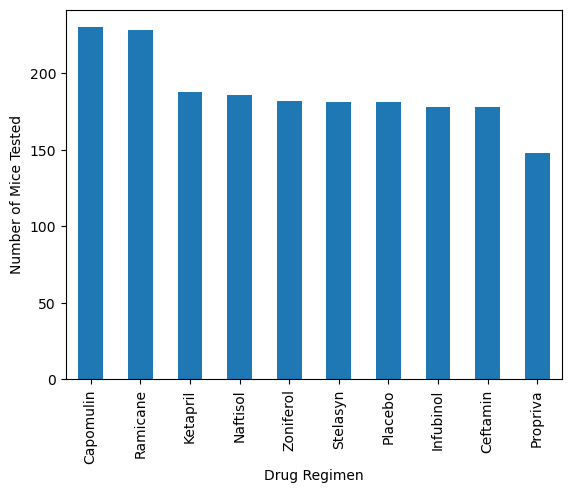

In [17]:
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()

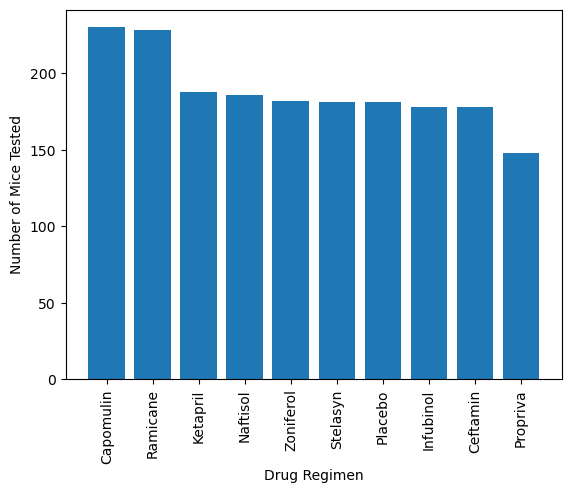

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = mouse_time_clean["Sex"].value_counts()
gender

Male      958
Female    922
Name: Sex, dtype: int64

<Axes: ylabel='Sex'>

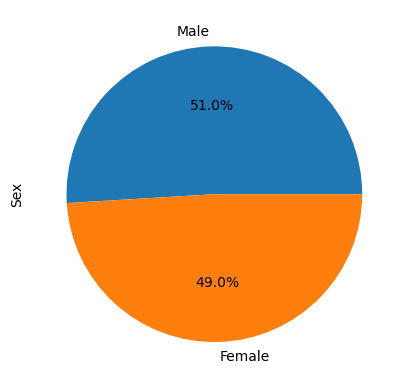

In [20]:
gender.plot(kind="pie", y="Sex", autopct="%1.1f%%")

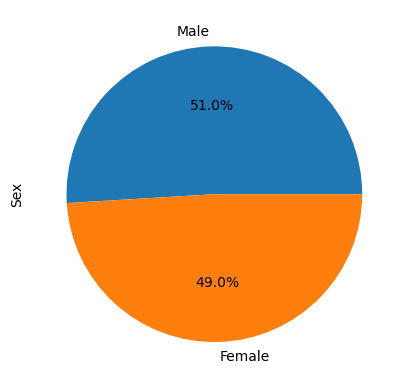

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


plt.pie(gender.values, labels=gender.index.values, autopct="%1.1f%%")
plt.ylabel("Sex")

plt.show()



## Quartiles, Outliers and Boxplots

In [22]:
# Start by getting the last (greatest) timepoint for each mouse

max_tumor_df = mouse_time_clean.groupby("Mouse ID")["Timepoint"].max()
max_tumor_df = max_tumor_df.reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merge_df = max_tumor_df.merge(mouse_time_clean, on=["Mouse ID","Timepoint"], how="left")
merge_df





,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [23]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
for drugs in treatments:
    final_tumor_volume = merge_df.loc[merge_df["Drug Regimen"]==drugs,"Tumor Volume (mm3)"]

    # add subset 
    
    tumor_vol_data.append(final_tumor_volume)
       
    # Determine outliers using upper and lower bounds

    quartiles = final_tumor_volume.quantile([.25,.5,.75])


    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]

    print(f"{drugs} potential outliers: {outliers}")


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


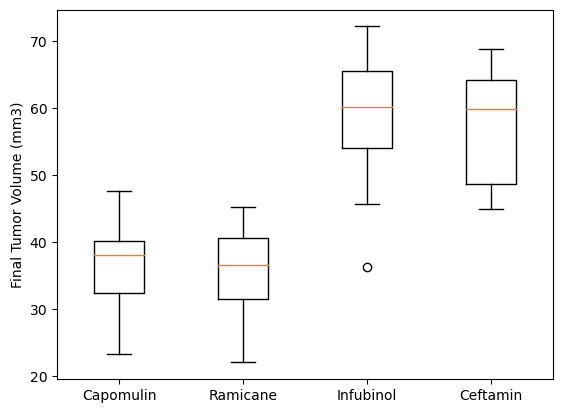

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Example outlier plot of reaction times


fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol_data, labels = treatments, widths = 0.4, vert=True)
plt.show()


## Line and Scatter Plots

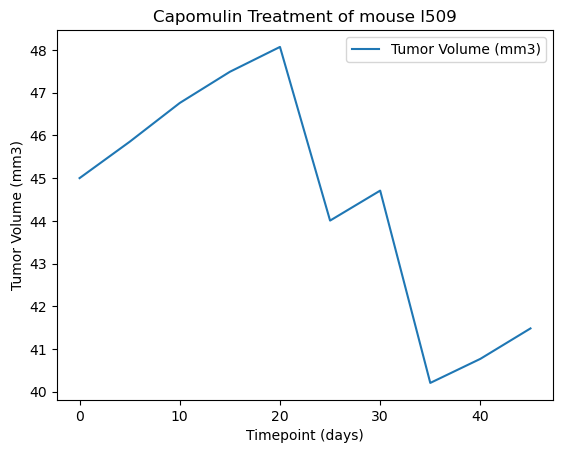

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
data_df.loc[(data_df["Mouse ID"]=="l509") & (data_df["Drug Regimen"]=="Capomulin")].plot(x="Timepoint",y="Tumor Volume (mm3)")

plt.title("Capomulin Treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

C:\Users\Micha\AppData\Local\Temp\ipykernel_29652\293464767.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  c_mice.mean()
C:\Users\Micha\AppData\Local\Temp\ipykernel_29652\293464767.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x = c_mice.groupby("Mouse ID").mean()


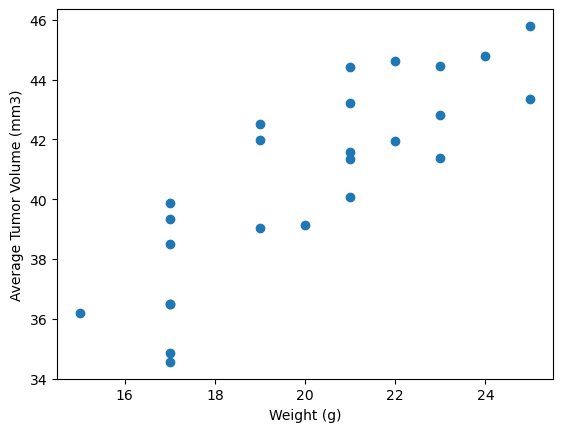

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
c_mice = mouse_time_clean.loc[(mouse_time_clean["Drug Regimen"]=="Capomulin")]
c_mice.mean()
x = c_mice.groupby("Mouse ID").mean()

plt.scatter(x["Weight (g)"], x["Tumor Volume (mm3)"])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
We can use this model because the pvalue is 1.3225722434712404e-07


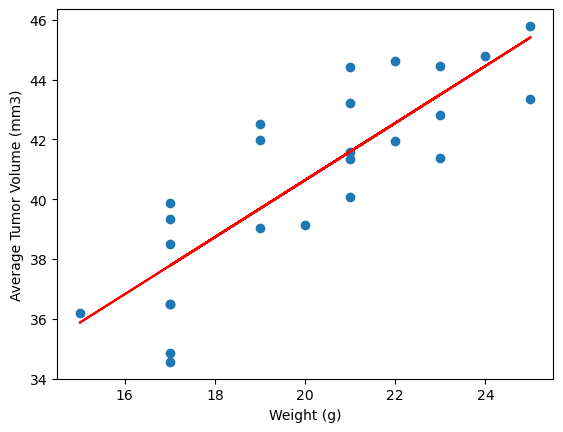

In [27]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

plt.scatter(x["Weight (g)"], x["Tumor Volume (mm3)"])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

linres = st.linregress(x["Weight (g)"], x["Tumor Volume (mm3)"])
linres.pvalue

regline = (x["Weight (g)"] * linres.slope) + linres.intercept

plt.plot(x["Weight (g)"],regline, color="r")
print(f"The correlation between mouse weight and the average tumor volume is {linres.rvalue:.2f}")
print(f"We can use this model because the pvalue is {linres.pvalue}")


